## Projet Machine Learning: Cas de Régression

## Objectif:
- **Développer un modèle de Machine Learning, permettant d'estimer les ventes en fonction de plusieurs variables**

### Importer les librairies pour lire, explorer et manipuler les données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorer les méssages d'avertissements
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image


### Importer et explorer  la source de données

In [2]:
df = pd.read_csv('Advertising.csv')
print(df.shape) # Format de la source (nombre de lignes, nombre de colonnes)
df.info()       # Affiche des  informations sur les données
df.head()       # Affiche les 5 premiers enregistrements

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Détection des valeurs manquantes, aberrantes, des doublons 

In [3]:
#Comptage du nombre de ligne duppiquées
df.duplicated().sum()

0

In [4]:
# Détection des valeurs manquantes
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

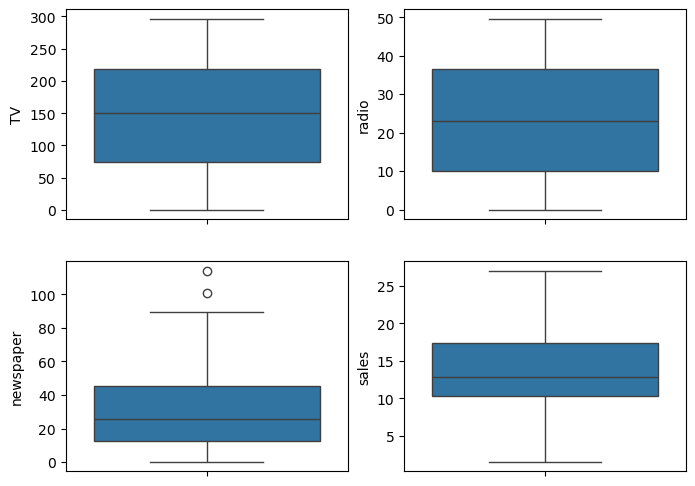

In [5]:
fig, axs = plt.subplots(2,2,figsize=(8,6),gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
sns.boxplot(df['TV'], ax = axs[0][0])
sns.boxplot(df['radio'], ax = axs[0][1])
sns.boxplot(df['newspaper'], ax = axs[1][0])
sns.boxplot(df['sales'], ax = axs[1][1])
plt.show()

#### Analyse des correlations entre les variables

<Figure size 200x200 with 0 Axes>

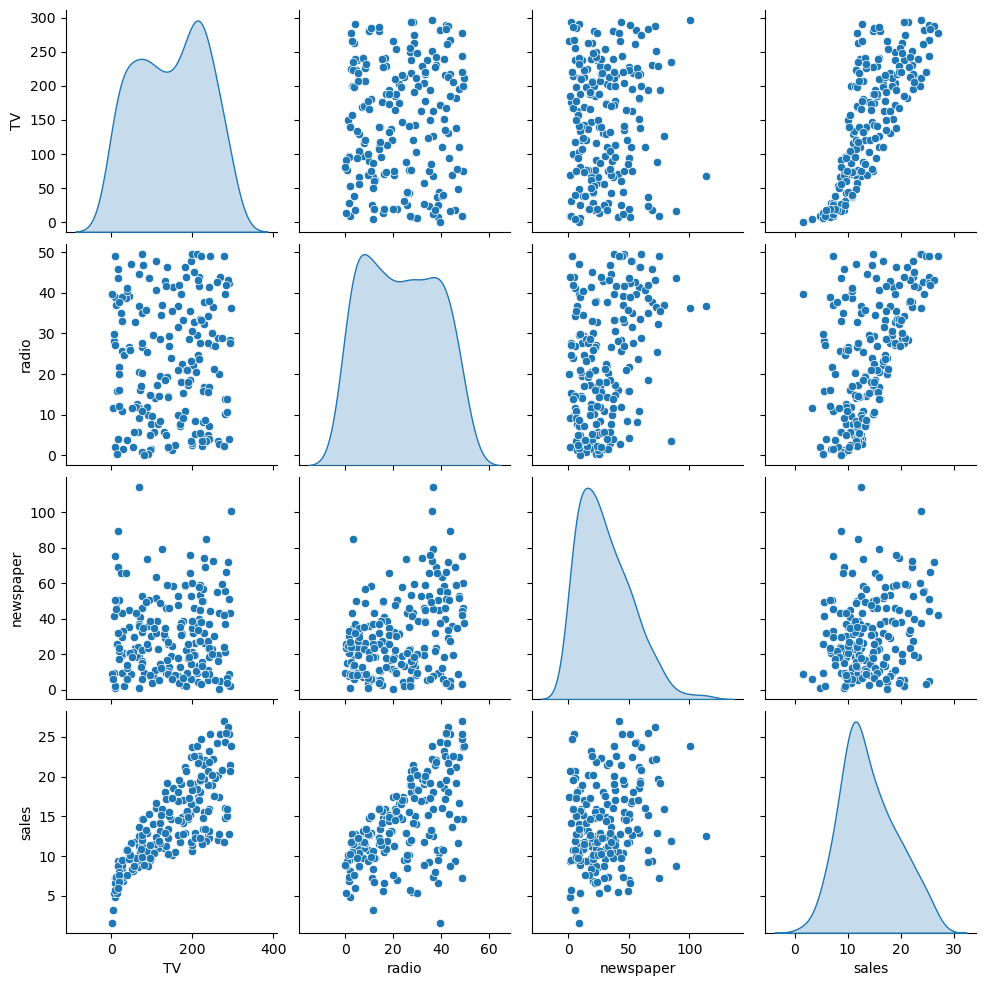

In [6]:
plt.figure(figsize=(2,2))
sns.pairplot(df, diag_kind = 'kde')
plt.show();

In [7]:
#Matrice de correlation
Mat_Corr = df.corr()
Mat_Corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


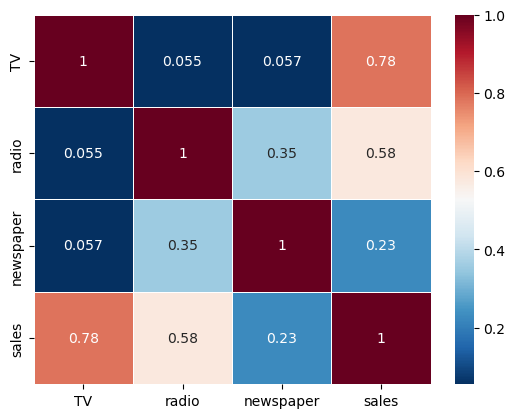

In [8]:
sns.heatmap(Mat_Corr, 
            xticklabels=Mat_Corr.columns,
            yticklabels=Mat_Corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.7);

## Modélisation

#### Importer les librairies pour la modélisation les testes 

In [9]:
# Préparer une base de test et une base d'apprentissage
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

# Importer la classe LinearRegression
from sklearn.linear_model import LinearRegression 

#Importer les metriques pour tester le modèle
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

#### Diviser la base en un ensemble d'apprentissage et un ensemble de test 

In [10]:
X= df[['TV', 'radio', 'newspaper']] # Les variables d'entrées
y= df[['sales']] # La variable de sortie
#Les ensembles d'apprentisssage et de test avec tous les variables
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30, random_state = 42)

In [11]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((140, 3), (140, 1), (60, 3), (60, 1))

### Modèle de régression utilisant  La régression linéaire

#### Recherche des modèles;
- Sales = a0+ a1 * TV + a2 * radio + a3 * newspaper
- Sales_r = a0+ a1 * TV + a2 * radio 

In [12]:
# Création des modèles
lr = LinearRegression()
# Apprentissage du modèle utilisant la base d'apprentissage
lr.fit(X_train,y_train)
# Test du modèle en utilisant la base de test
y_pred = lr.predict(X_test)

In [13]:
#Calcul des paramètres du modèle entier
print('Les paramètre du modèle entier:')
print('-------------------------------------\n')
a0 = lr.intercept_   
a1 = lr.coef_[0][0]
a2 = lr.coef_[0][1]
a3 = lr.coef_[0][2]
print("a0=", a0)
print("a1=", a1)
print("a2=", a2)
print("a3=", a3)
print('\nLes paramètre du modèle sans la variable newspapers:')
print('---------------------------------------------------------')

Les paramètre du modèle entier:
-------------------------------------

a0= [2.70894909]
a1= 0.04405928095746521
a2= 0.1992874968989396
a3= 0.006882452222275445

Les paramètre du modèle sans la variable newspapers:
---------------------------------------------------------


### Modèle de régression utilisant  Les arbres de décision

In [14]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor

In [15]:
#Création du modèle
tree = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree.fit(X_train,y_train)
# Test du modèle en utilisant la base de test
pred_tree= tree.predict(X_test)

### Modèle de régression utilisant  Les forêts aléatoires

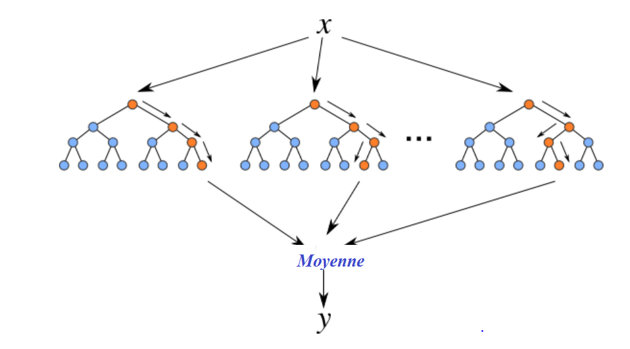

In [16]:
Image('RF_Regressor.PNG', width = 500, height = 300)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
#Création du modèle
rf = RandomForestRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
rf.fit(X_train,y_train)
# Test du modèle en utilisant la base de test
pred_rf= rf.predict(X_test)

### Modèle de régression utilisant  K plus proches voisins (KNN) 

In [19]:
from sklearn.neighbors import KNeighborsRegressor

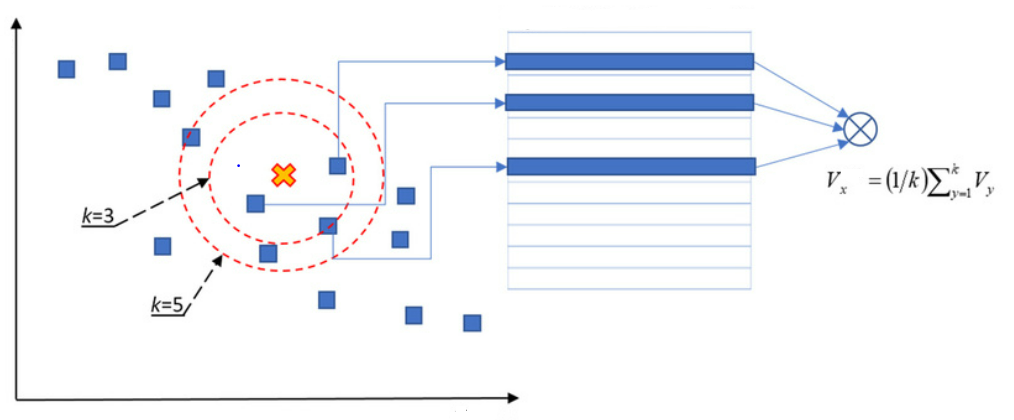

In [20]:
Image('KNN_Regressor.PNG', width = 500, height = 300)

In [21]:
#Création du modèle
knn = KNeighborsRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
knn.fit(X_train,y_train)
# Test du modèle en utilisant la base de test
pred_knn= knn.predict(X_test)

### Qualité des modèles developés

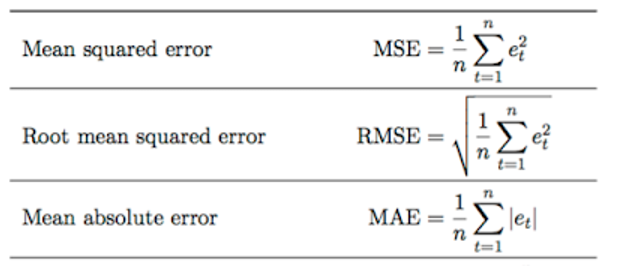

In [22]:
Image('Metrics.PNG')

In [23]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle de régression
print("Qualité du modèle de régression:")
print('-------------------------------------')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = lr.score(X_test, y_test)
r_score = np.sqrt(r2_score)
print ("MAE=", mae)
print ("MSE=", mse)
print("RMSE=" , np.sqrt(mse))
print("R= ", r_score)
print("R²= ", r2_score)

Qualité du modèle de régression:
-------------------------------------
MAE= 1.5116692224549086
MSE= 3.796797236715221
RMSE= 1.948537204344639
R=  0.927872109087797
R²=  0.8609466508230368


In [24]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle d'arbre de décision
print("Qualité du modèle d'arbre de décision:")
print('-------------------------------------')
mae_TREE = mean_absolute_error(y_test, pred_tree)
mse_TREE = mean_squared_error(y_test, pred_tree)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree.score(X_test, y_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

Qualité du modèle d'arbre de décision:
-------------------------------------
MAE Modèle TREE= 1.0866666666666671
MSE Modèle TREE= 2.0026666666666673
RMSE Modèle TREE= 1.4151560573543356
R=  0.9626290186732699
R²=  0.9266546275918626


In [25]:
# Clacul de MAE, MSE, RMSE, R et R² 
print("Qualité du modèle de forêts aléatoires:")
print('-------------------------------------')
mae_RF= mean_absolute_error(y_test, pred_rf)
mse_RF = mean_squared_error(y_test, pred_rf)
rmse_RF = np.sqrt(mse_RF)
r2_score = rf.score(X_test, y_test)
r_score = np.sqrt(r2_score)
print ("MAE RF =", mae_RF)
print ("MSE RF =", mse_RF)
print("RMSE RF  =" ,rmse_RF)
print("R= ", r_score)
print("R²= ", r2_score)

Qualité du modèle de forêts aléatoires:
-------------------------------------
MAE RF = 0.5756666666666663
MSE RF = 0.45312466666666773
RMSE RF  = 0.673145353297984
R=  0.9916677004842727
R²=  0.9834048281837651


In [26]:
# Clacul de MAE, MSE, RMSE, R et R² 
print("Qualité du modèle K proches voisins:")
print('-------------------------------------')
mae_knn = mean_absolute_error(y_test, pred_knn)
mse_knn= mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_score = knn.score(X_test, y_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN =", mae_knn)
print ("MSE KNN =", mse_knn)
print("RMSE KNN =" ,rmse_knn)
print("R= ", r_score)
print("R²= ", r2_score)

Qualité du modèle K proches voisins:
-------------------------------------
MAE KNN = 1.178666666666667
MSE KNN = 2.523600000000001
RMSE KNN = 1.5885842753848476
R=  0.9526678545225987
R²=  0.9075760410406912


In [27]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [28]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [30]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Estimation de K pour le modèle KNN

In [31]:
rmse_val = [] #pour stocker les valeurs rmse pour différents k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = np.sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) #stocker les valeurs rmse
    print('k=', K ,'RMSE=', error)

k= 1 RMSE= 1.6798809481626966
k= 2 RMSE= 1.6109003693587012
k= 3 RMSE= 1.599334352276087
k= 4 RMSE= 1.5804304529673763
k= 5 RMSE= 1.5885842753848476
k= 6 RMSE= 1.519690209658973
k= 7 RMSE= 1.5214945212623319
k= 8 RMSE= 1.610774270343303
k= 9 RMSE= 1.6387105992162068
k= 10 RMSE= 1.6709722718625024
k= 11 RMSE= 1.7953463718851923
k= 12 RMSE= 1.8397218237790431
k= 13 RMSE= 1.888752653941538
k= 14 RMSE= 1.9079029161398557
k= 15 RMSE= 1.9814364411634227
k= 16 RMSE= 1.981613728442049
k= 17 RMSE= 1.9878319291496227
k= 18 RMSE= 2.02587632818969
k= 19 RMSE= 2.069272067243289
k= 20 RMSE= 2.1378484121502472


<Axes: >

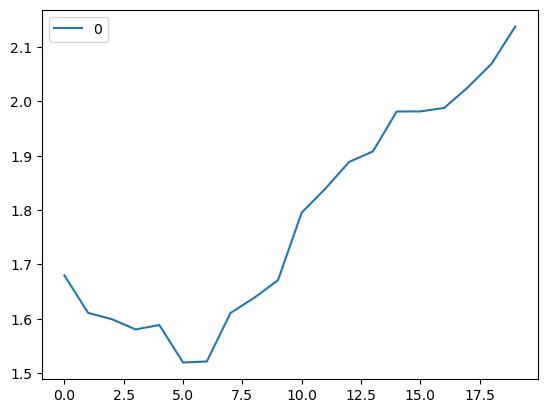

In [32]:
#Graphe des valeurs rmse par rapport aux valeurs k
curve = pd.DataFrame(rmse_val)
curve.plot()

In [33]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 4}

### Developpement du modèle KNN avec le meilleur Hypèreparametre

In [34]:
#Création du modèle
knn_4 = KNeighborsRegressor(n_neighbors=4)
# Apprentissage du modèle utilisant la base d'apprentissage
knn_4.fit(X_train,y_train)
# Test du modèle en utilisant la base de test
pred_knn4= knn_4.predict(X_test)

In [35]:
# Clacul de MAE, MSE, RMSE, R et R² 
print("Qualité du modèle K proches voisins K=4:")
print('-------------------------------------')
mae_knn4 = mean_absolute_error(y_test, pred_knn4)
mse_knn4= mean_squared_error(y_test, pred_knn4)
rmse_knn4 = np.sqrt(mse_knn4)
r2_score = knn_4.score(X_test, y_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN =", mae_knn4)
print ("MSE KNN =", mse_knn4)
print("RMSE KNN =" ,rmse_knn4)
print("R= ", r_score)
print("R²= ", r2_score)

Qualité du modèle K proches voisins K=4:
-------------------------------------
MAE KNN = 1.18125
MSE KNN = 2.4977604166666665
RMSE KNN = 1.5804304529673763
R=  0.9531644066887944
R²=  0.9085223861784015
